[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github//Madeira-International-Workshop-in-ML/2022_day_2/blob/main/CNN.ipynb)

# Convolutional Neural Networks

In [2]:
import numpy as np
from scipy import signal
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Conv1D, BatchNormalization, MaxPooling1D, Activation, Flatten, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import os
import pickle

import pydot 
import graphviz

from sklearn.metrics import confusion_matrix

# MNIST data loading 


In [3]:
# loading data
#https://en.wikipedia.org/wiki/MNIST_database
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

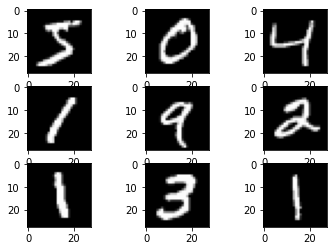

In [4]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

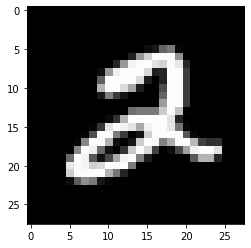

5


In [5]:
# data view
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
plt.imshow(x_train[5],cmap=plt.cm.gray)
plt.show()
print(y_train[0])

In [6]:
# train data 
x_train.shape

(60000, 28, 28)

In [7]:
# test data 
x_test.shape

(10000, 28, 28)

# Convolutional Operation

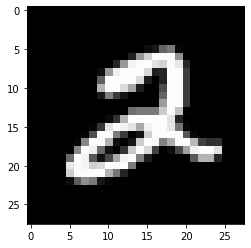

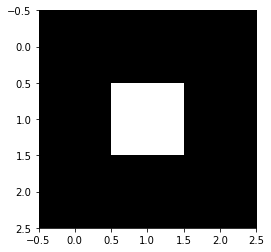

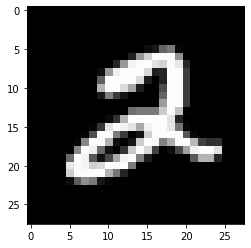

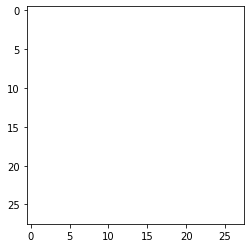

In [8]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[5]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[0., 0., 0.],[0, 1, 0],[0., 0., 0.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
for i in range(0,5):
    filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

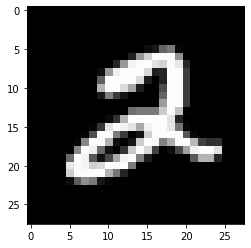

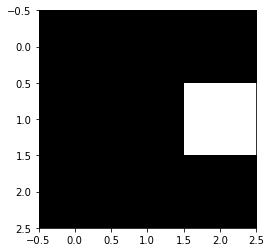

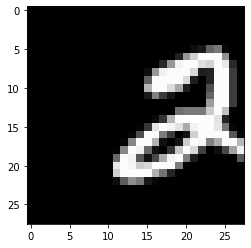

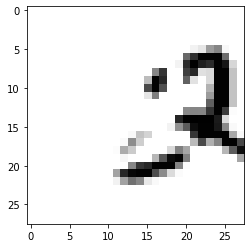

In [9]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[5]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[0., 0., 0.],[0, 0, 1],[0., 0., 0.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
for i in range(0,5):
     filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

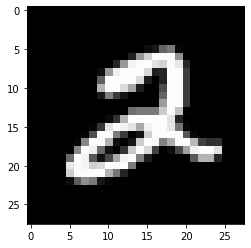

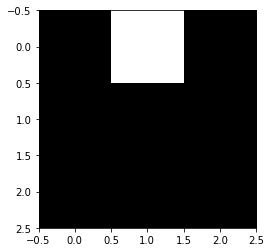

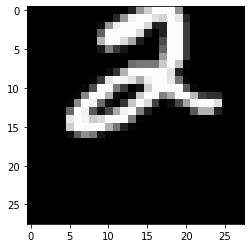

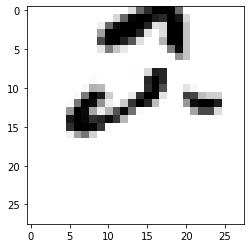

In [10]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[5]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[0., 1., 0.],[0, 0, 0],[0., 0., 0.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
for i in range(0,5):
     filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

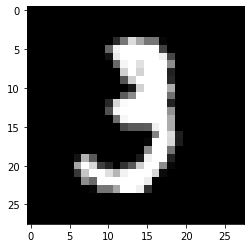

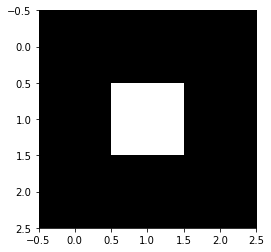

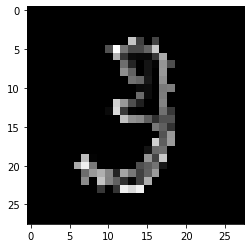

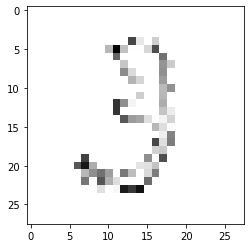

In [11]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[10]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[-1., -1., -1.],[-1., 8., -1.],[-1., -1., -1.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
# for i in range(0,2):
#     filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

outputs is Shrinking 
Loosing information on corners of the image

Second method: (((W - K + 2P)/S) + 1)
        Here W = Input size
        K = Filter size
        S = Stride
        P = Padding 

        inpput_size - (filter_size - 1)

# Data pre-process

In [12]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [13]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
#-1 means that the length in that dimension is inferred.

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [16]:
y_train_cat.shape

(60000, 10)

In [17]:
len(np.unique(y_train))

10

# Create a Sequential Model

In [18]:
model_sq = Sequential()

model_sq.add(Input(shape=(28, 28, 1)))



In [ ]:
model_sq.add()
#model_sq.add(Conv2D(32, (3, 3), activation='relu'))

In [ ]:
model_sq.add()
#model_sq.add(MaxPool2D(pool_size=(2, 2)))

In [ ]:
#model_sq.add(Conv2D(32, (3, 3), activation='relu'))
#model_sq.add(Dropout(0.5))

#model_sq.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_sq.add(MaxPool2D(pool_size=(2, 2)))

model_sq.add(Conv2D(64, (3, 3), activation='relu'))
model_sq.add(MaxPool2D(pool_size=(2, 2)))

In [19]:
model_sq.add(Flatten())
model_sq.add(Dense(128, activation='relu'))
model_sq.add(Dropout(0.5))
model_sq.add(Dense(10, activation='softmax'))



In [20]:
model_sq.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

What we ceated

In [21]:
model_sq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [22]:
model_sq.layers[3]

In [23]:

tf.keras.utils.plot_model(model_sq, "my_first_model.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [24]:
#Train the model.model

In [25]:
model_sq_history = model_sq.fit(x_train, y_train_cat, batch_size=64,
          epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 19s 28ms/step - loss: 0.3091 - accuracy: 0.9049 - val_loss: 0.0797 - val_accuracy: 0.9743
Epoch 2/5
657/657 [==============================] - 20s 30ms/step - loss: 0.0988 - accuracy: 0.9710 - val_loss: 0.0570 - val_accuracy: 0.9827
Epoch 3/5
657/657 [==============================] - 17s 26ms/step - loss: 0.0724 - accuracy: 0.9791 - val_loss: 0.0506 - val_accuracy: 0.9847
Epoch 4/5
657/657 [==============================] - 25s 38ms/step - loss: 0.0583 - accuracy: 0.9822 - val_loss: 0.0443 - val_accuracy: 0.9869
Epoch 5/5
657/657 [==============================] - 20s 30ms/step - loss: 0.0507 - accuracy: 0.9851 - val_loss: 0.0399 - val_accuracy: 0.9893


313/313 [==============================] - 1s 4ms/step - loss: 0.0275 - accuracy: 0.9918
0.9918000102043152


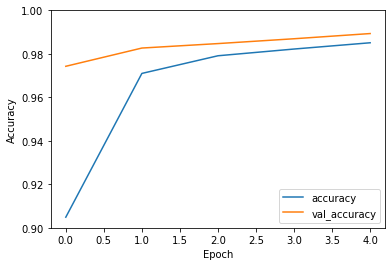

In [26]:
plt.plot(model_sq_history.history['accuracy'], label='accuracy')
plt.plot(model_sq_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_sq.evaluate(x_test,  y_test_cat)
print(test_acc)

In [27]:
y_pred = model_sq.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [28]:
print(y_pred)

[[2.3499001e-09 6.8664455e-08 4.3311875e-06 ... 9.9999201e-01
  6.0563785e-09 6.9453154e-07]
 [1.2039677e-06 1.2013979e-05 9.9998426e-01 ... 9.0022251e-10
  5.6397433e-08 2.1697650e-09]
 [3.0495750e-09 9.9999177e-01 3.8061771e-08 ... 1.8932327e-06
  5.7750604e-08 1.7010851e-08]
 ...
 [1.3874001e-13 9.9836646e-09 1.1082944e-13 ... 1.3812614e-09
  5.6785495e-08 2.5691730e-08]
 [2.5625311e-09 4.0082240e-10 1.7283529e-11 ... 2.1630130e-10
  3.7206373e-06 1.8359067e-07]
 [1.3160084e-07 9.5196242e-09 5.0515069e-07 ... 2.5472755e-13
  2.8023740e-08 8.1070123e-10]]


In [29]:
y_pred_number=np.argmax(y_pred,axis=1)
print(y_pred_number)

[7 2 1 ... 4 5 6]


In [30]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(np.argmax(y_test_cat,axis=1), np.argmax(y_pred,axis=1))

In [31]:
print(cf_matrix)

[[ 976    0    0    0    0    0    2    1    1    0]
 [   0 1131    1    1    0    1    1    0    0    0]
 [   1    3 1025    0    1    0    0    1    1    0]
 [   0    0    4 1005    0    0    0    0    1    0]
 [   0    0    0    0  975    0    1    0    2    4]
 [   1    0    1    5    0  880    1    1    1    2]
 [   2    2    0    0    1    2  951    0    0    0]
 [   0    3    6    0    0    0    0 1017    1    1]
 [   1    2    1    1    0    1    1    2  963    2]
 [   2    3    0    0    0    3    0    3    3  995]]


 CIFAR10 dataset


In [32]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


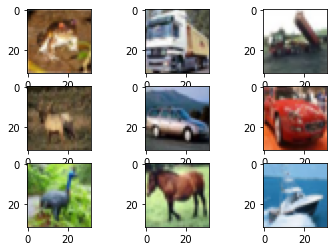

In [33]:


for i in range(9):
	# define subplot
    plt.subplot(330 + 1 + i)
	# plot raw pixel data
    plt.imshow(train_images[i])
# show the figure
plt.show()



In [34]:
y_train_labels_cat = to_categorical(train_labels, 10)
y_test_labels_cat = to_categorical(test_labels, 10)

In [35]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [36]:
train_images.shape

(50000, 32, 32, 3)

In [37]:
model_sq3 = Sequential()
model_sq3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_sq3.add(MaxPool2D ((2, 2)))
model_sq3.add(Conv2D(64, (3, 3), activation='relu'))
model_sq3.add(MaxPool2D ((2, 2)))
model_sq3.add(Conv2D(64, (3, 3), activation='relu'))


In [38]:
model_sq3.add(Flatten())
model_sq3.add(Dense(64, activation='relu'))
model_sq3.add(Dense(10, activation='softmax'))


Compile and train the model

In [39]:
model_sq3.compile(loss='categorical_crossentropy',#'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_sq3_history = model_sq3.fit(train_images,y_train_labels_cat , batch_size=64,
          epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
547/547 [==============================] - 23s 40ms/step - loss: 1.6330 - accuracy: 0.4013 - val_loss: 1.4225 - val_accuracy: 0.4789
Epoch 2/5
547/547 [==============================] - 22s 39ms/step - loss: 1.2881 - accuracy: 0.5405 - val_loss: 1.2466 - val_accuracy: 0.5565
Epoch 3/5
547/547 [==============================] - 20s 37ms/step - loss: 1.1518 - accuracy: 0.5915 - val_loss: 1.1373 - val_accuracy: 0.5993
Epoch 4/5
547/547 [==============================] - 21s 38ms/step - loss: 1.0607 - accuracy: 0.6252 - val_loss: 1.0606 - val_accuracy: 0.6279
Epoch 5/5
547/547 [==============================] - 21s 39ms/step - loss: 0.9770 - accuracy: 0.6566 - val_loss: 1.0135 - val_accuracy: 0.6470


313/313 [==============================] - 2s 5ms/step - loss: 1.0104 - accuracy: 0.6428
0.642799973487854


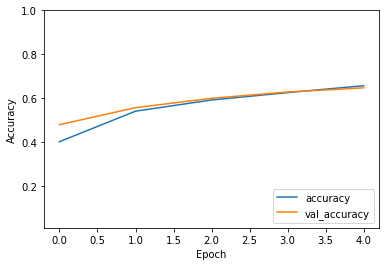

In [40]:
plt.plot(model_sq3_history.history['accuracy'], label='accuracy')
plt.plot(model_sq3_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.009, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_sq3.evaluate(test_images,  y_test_labels_cat)
print(test_acc)

Transfer learning

In [41]:
train_images.shape

(50000, 32, 32, 3)

In [42]:
train_images.shape

(50000, 32, 32, 3)

In [43]:
train_images_grayscaled = tf.image.rgb_to_grayscale(train_images)
test_images_grayscaled = tf.image.rgb_to_grayscale(test_images)
train_images_grayscaled.shape


TensorShape([50000, 32, 32, 1])

In [44]:
IMG_SIZE = 28

resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers .Rescaling(1./255)
])
train_images_resized_grayscaled = resize_and_rescale(train_images_grayscaled)
test_images_resized_grayscaled = resize_and_rescale(test_images_grayscaled)

In [45]:
train_images_resized_grayscaled.shape

TensorShape([50000, 28, 28, 1])

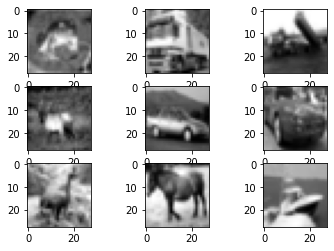

In [46]:
for i in range(9):
	# define subplot
    plt.subplot(330 + 1 + i)
	# plot raw pixel data
    plt.imshow(train_images_resized_grayscaled[i], cmap=plt.get_cmap('gray'))#gray
# show the figure
plt.show()

In [47]:
model_sq.layers[0].trainable

True

In [48]:
model_sq.layers[0].trainable=False

In [49]:
model_sq.layers[0].trainable

False

In [50]:


for layer_number in range (0,len(model_sq.layers)-4):
    model_sq.layers[layer_number].trainable = False
    print('Layer ' +  model_sq.layers[layer_number].name + ' frozen.')



Layer conv2d frozen.
Layer max_pooling2d frozen.
Layer conv2d_1 frozen.
Layer max_pooling2d_1 frozen.


In [51]:
print(model_sq.layers[-5])

In [52]:

flat1 = Flatten()(model_sq.layers[-5].output)
class1 = Dense(124, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model_transfer = tf.keras.Model(inputs=model_sq.inputs, outputs=output)

In [53]:
model_transfer.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [54]:
model_transfer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0     

In [55]:
model_transfer_history = model_transfer.fit(np.array(train_images_resized_grayscaled), y_train_labels_cat, batch_size=64,
          epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
547/547 [==============================] - 5s 8ms/step - loss: 2.3028 - accuracy: 0.0965 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 2/5
547/547 [==============================] - 4s 8ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.0979
Epoch 3/5
547/547 [==============================] - 4s 8ms/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3027 - val_accuracy: 0.0984
Epoch 4/5
547/547 [==============================] - 4s 8ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 5/5
547/547 [==============================] - 4s 8ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.0979
